# Neural Network using only Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mnist_train.csv")

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [4]:
# Initialize parameters (using 15 neurons)
neurons = 15;

# Found on the forum to fix normalization
def init_params():
    # Weight and biases with 2 hidden layers
    W1 = np.random.normal(size=(neurons, 784)) * np.sqrt(1./784)
    b1 = np.random.normal(size=(neurons,1)) * np.sqrt(1./neurons) # 15 neurons
    W2 = np.random.normal(size=(neurons, neurons)) * np.sqrt(1./(neurons+10)) # 15 neurons + 10
    b2 = np.random.normal(size=(neurons,1)) * np.sqrt(1./784)
    return W1, b1, W2, b2

# Activation function
def ReLU(Z):
    # element >= 0 = Z, element < 0 = 0
    return np.maximum(Z, 0)

# Softmax activation function (Found on the forum to fix runtime error or accuracy issue)
def softmax(Z):
    Z -= np.max(Z, axis=0) # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis = 0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# One-hot encode Y
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, neurons))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Derivative of activation function
def deriv_ReLU(Z):
    # slope = 1 when > 0, slope = 0 when < 0
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # Every 50th iterations
        if (i % 50 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.10)

Iteration:  0
[6 6 6 ... 0 6 6] [4 3 3 ... 2 8 4]
Accuracy:  0.16093493110052712
Iteration:  50
[6 3 7 ... 6 3 9] [4 3 3 ... 2 8 4]
Accuracy:  0.7688265902811912
Iteration:  100
[6 5 7 ... 2 3 9] [4 3 3 ... 2 8 4]
Accuracy:  0.8402345802471228
Iteration:  150
[6 5 7 ... 2 3 9] [4 3 3 ... 2 8 4]
Accuracy:  0.8683198020305429
Iteration:  200
[6 5 7 ... 2 3 4] [4 3 3 ... 2 8 4]
Accuracy:  0.8833709045916033
Iteration:  250
[4 5 7 ... 2 3 4] [4 3 3 ... 2 8 4]
Accuracy:  0.8917608773030051
Iteration:  300
[4 5 7 ... 2 3 4] [4 3 3 ... 2 8 4]
Accuracy:  0.8970491025271615
Iteration:  350
[4 5 7 ... 2 3 4] [4 3 3 ... 2 8 4]
Accuracy:  0.9016593501584773
Iteration:  400
[4 5 7 ... 2 3 4] [4 3 3 ... 2 8 4]
Accuracy:  0.9051509347616061
Iteration:  450
[4 5 7 ... 2 3 4] [4 3 3 ... 2 8 4]
Accuracy:  0.9074899574569061


In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')

Prediction:  [7]
Label:  7


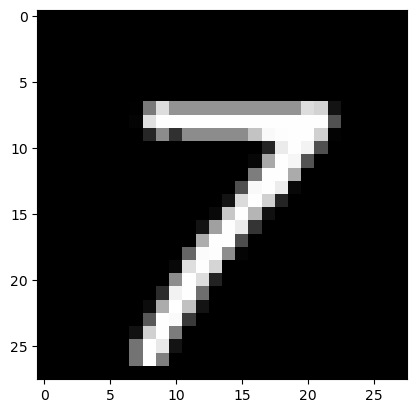

In [8]:
test_prediction(10, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 3 6 8 1 1 8 1 2 5 5 0 4 2 2 7 2 0 3 0 4 7 9 8 4 1 2 2 3 8 5 0 1 1 1 8 0
 2 5 6 4 4 1 7 8 1 0 6 0 2 0 2 8 5 0 6 7 1 9 3 2 4 4 1 2 8 9 6 7 0 7 3 1 7
 1 9 7 1 8 9 6 0 8 0 9 0 2 6 7 0 9 3 0 0 8 5 7 2 3 2 3 9 8 3 3 5 2 7 4 1 1
 1 1 4 0 5 0 9 3 7 4 6 5 3 9 5 5 4 3 1 1 1 7 8 6 0 8 9 5 3 0 0 0 4 4 6 5 4
 6 0 1 3 0 9 4 3 1 0 2 4 5 0 3 9 2 9 6 7 8 2 2 4 4 4 3 3 6 6 0 0 8 1 6 5 1
 6 7 0 3 5 1 6 3 1 0 4 4 1 7 2 0 7 3 6 0 1 8 3 7 1 3 7 8 0 9 0 6 2 6 7 9 6
 4 8 3 5 2 7 5 4 4 8 2 3 8 1 2 1 4 4 1 4 9 6 9 9 2 5 9 0 4 3 0 1 1 2 8 3 2
 9 3 0 8 7 5 1 2 3 0 7 0 7 0 1 6 6 8 7 7 2 4 5 9 6 1 5 6 5 4 0 6 7 7 1 1 0
 3 7 3 1 8 9 6 8 6 0 9 3 0 5 4 9 4 4 4 5 4 3 1 8 1 0 3 1 3 2 3 4 2 1 7 5 4
 1 9 6 1 6 6 7 3 2 4 9 0 6 9 7 8 3 1 2 8 2 1 4 8 3 8 8 4 0 9 2 4 4 5 2 2 7
 6 6 1 0 2 4 1 6 6 4 2 1 3 9 5 9 4 5 2 3 1 4 6 1 1 0 9 3 4 6 6 1 1 5 2 9 1
 9 1 0 3 7 6 4 3 6 6 1 1 5 3 4 5 0 2 1 3 1 3 5 5 8 8 2 8 9 1 7 6 4 0 2 8 7
 8 8 7 0 1 8 4 1 2 0 9 4 4 4 7 4 6 5 4 2 4 6 2 4 4 0 6 5 6 6 9 1 3 9 8 9 0
 6 0 7 6 3 5 3 9 0 4 2 2 

0.925